In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (9, 9),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
import networkx as nx
import pandas as pd
import numpy as np

In [8]:
d = {'source': ['A','B','C','C','A','C','D'], 'target': ['B','C','B','A','C','D','A'], 'weight': [10.0, 10.0, 10.0, 5, 10.0, 1, 5]}
df = pd.DataFrame(data=d)
#df

In [9]:
d = {
		'source': ['Aus','Aus','Aus','Eng','Eng','Eng','Ind','Ind','Ind','Pak','Pak','Pak',   'Aus','Eng','Ind','Pak','SA','SA','SA','SA'], 
		'target': ['Eng','Ind','Pak','Aus','Ind','Pak','Aus','Eng','Pak','Aus','Eng','Ind',   'SA','SA','SA','SA','Aus','Eng','Ind','Pak'], 
		#'weight': [27.0,24.0,12.0,33.0,31.0,4.0,18.0,11.0,1.0,7.0,8.0,3.0]
        #'weight': [0.36, 0.33, 0.45, 0.38, 0.30, 0.36, 0.30, 0.28, 0.19, 0.33, 0.35, 0.38]
        #'weight': [36, 33, 45, 38, 30, 36, 30, 28, 19, 33, 35, 38]
        #'weight': [30, 36, 34, 30, 38, 32, 35, 40, 25, 24, 31, 45]
        'weight': [0.46,0.64,0.52,0.54,0.58,0.44,0.36,0.42,0.2,0.48,0.56,0.8,   0.7,0.7,0.7,0.7,0.1,0.1,0.1,0.1]
	}
df = pd.DataFrame(data=d)
#df

In [10]:
df = pd.read_excel('test_team_ranking.xlsx' , sheet_name = 'Sheet4')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team               268 non-null    object 
 1   opponent           268 non-null    object 
 2   concat             268 non-null    object 
 3   total_matches      268 non-null    int64  
 4   won                268 non-null    int64  
 5   lost               268 non-null    int64  
 6   nr                 268 non-null    int64  
 7   outbound_loss      268 non-null    float64
 8   inbound_win        268 non-null    float64
 9   ol2                268 non-null    float64
 10  iw2                268 non-null    float64
 11  ol3                268 non-null    float64
 12  cum_weight_add     268 non-null    float64
 13  cum_weight_loss    268 non-null    float64
 14  cum_weight_change  268 non-null    float64
dtypes: float64(8), int64(4), object(3)
memory usage: 31.5+ KB


In [6]:
G=nx.from_pandas_edgelist(df, 'team', 'opponent', create_using=nx.DiGraph)

In [7]:
G_weighted=nx.from_pandas_edgelist(df, 'team', 'opponent', create_using=nx.DiGraph, edge_attr='ol3')

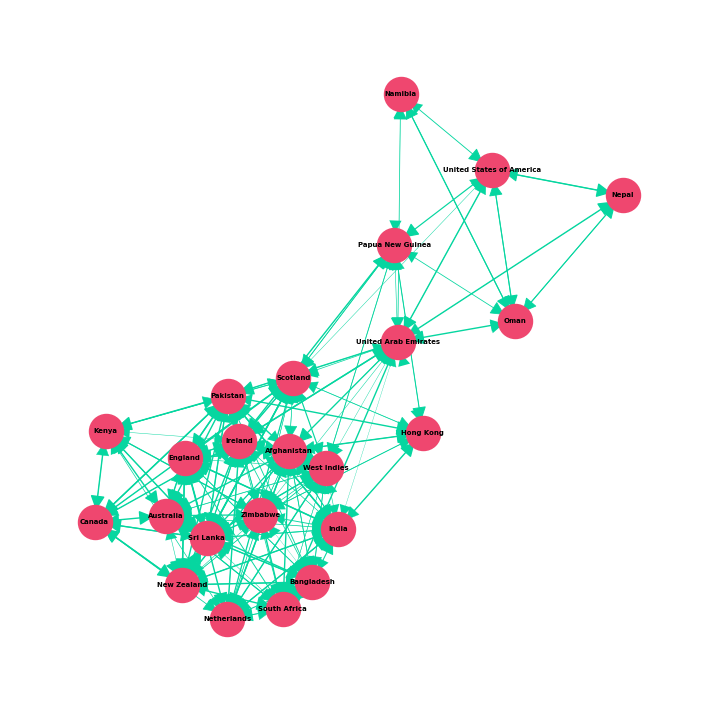

In [8]:
weights = [i * 1 for i in df['outbound_loss'].tolist()]

pos = nx.spring_layout(G_weighted, k=0.9)
nx.draw_networkx_edges(G_weighted, pos, edge_color='#06D6A0', arrowsize=22, width=weights)
nx.draw_networkx_nodes(G_weighted, pos,node_color='#EF476F', node_size=600)
nx.draw_networkx_labels(G_weighted, pos, font_size=5, font_weight='bold', font_color='black')
plt.gca().margins(0.1, 0.1)
plt.show()

In [11]:
df.head()

,team,opponent,concat,total_matches,won,lost,nr,outbound_loss,inbound_win,ol2,iw2,ol3,cum_weight_add,cum_weight_loss,cum_weight_change
0,Afghanistan,Australia,AfghanistanAustralia,3,0,3,0,1.00,0.00,1.00,0.00,3.00,0.000000,8.141593,-8.141593
1,Afghanistan,Bangladesh,AfghanistanBangladesh,8,3,5,0,0.63,0.37,0.63,0.37,5.04,7.811111,5.129204,2.681908
2,Afghanistan,England,AfghanistanEngland,2,0,2,0,1.00,0.00,1.00,0.00,2.00,0.000000,8.141593,-8.141593
3,Afghanistan,Hong Kong,AfghanistanHong Kong,1,0,1,0,1.00,0.00,1.00,0.00,1.00,0.000000,8.141593,-8.141593
4,Afghanistan,India,AfghanistanIndia,3,0,2,1,0.67,0.33,0.67,0.33,2.01,21.241379,5.454867,15.786512


In [48]:
x = []
for i1, r1 in df[:1].iterrows():
    for i2, r2 in df[:20].iterrows():
        if (r1['team'] == r2['team'] and r1['opponent'] == r2['opponent']):
            rec = [r1['team'], r1['opponent'], r1['total_matches'], r1['won']-r2['won'], r1['nr']]
            print(rec)
        else:
            print("pass")
            


['Afghanistan', 'Australia', 3, 0, 0]
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass
pass


In [19]:
data = {
    'team': ['Ind', 'Aus'],
    'opponent': ['Aus', 'Ind'],
    'total_matches': [22, 22],
    'won': [10, 12],
    'lost': [12, 10]
}

df = pd.DataFrame(data)

# Normalizing team pairs
df['team1'] = df[['team', 'opponent']].min(axis=1)
df['team2'] = df[['team', 'opponent']].max(axis=1)

df.head()

,team,opponent,total_matches,won,lost,team1,team2
0,Ind,Aus,22,10,12,Aus,Ind
1,Aus,Ind,22,12,10,Aus,Ind


In [20]:
grouped = df.groupby(['team1', 'team2'], as_index=False).agg({
    'total_matches': 'first',
    'won': 'sum',
    'lost': 'sum'
})

grouped.head()

,team1,team2,total_matches,won,lost
0,Aus,Ind,22,22,22


In [21]:
# Grouping by normalized team pairs and summing matches


# Calculating the score with respect to team1
grouped['score'] = grouped['won'] - grouped['lost']

# Dropping unnecessary columns
grouped = grouped.drop(columns=['won', 'lost'])

# Displaying the result
print(grouped)

  team1 team2  total_matches  score
0   Aus   Ind             22      0


In [16]:
grouped.head()

,team1,team2,total_matches,score
0,Afghanistan,Australia,3,0
1,Afghanistan,Bangladesh,8,0
2,Afghanistan,England,2,0
3,Afghanistan,Hong Kong,1,0
4,Afghanistan,India,3,0


In [210]:
simple_pagerank = nx.pagerank(G, alpha=0.85)
#personalized_pagerank = nx.pagerank(G, alpha=0.85, personalization={'Aus': 0.2, 'Eng': 0.2, 'Ind': 0.2, 'Pak': 0.2, 'SA': 0.2})
#nstart_pagerank = nx.pagerank(G, alpha=0.85, nstart={'Aus': 0, 'Eng': 0, 'Ind': 1, 'Pak': 0, 'SA': 0.2})
weighted_pagerank = nx.pagerank(G_weighted, alpha=0.85)
#weighted_personalized_pagerank = nx.pagerank(G_weighted, alpha=0.85, personalization={'Aus': 0, 'Eng': 0, 'Ind': 1, 'Pak': 0, 'SA': 0})

df_metrics = pd.DataFrame(dict(
    simple_pagerank = simple_pagerank,
    #personalized_pagerank = personalized_pagerank,
    #nstart_pagerank = nstart_pagerank,
    weighted_pagerank = weighted_pagerank,
    #weighted_personalized_pagerank = weighted_personalized_pagerank,
))
df_metrics.index.name='urls'
df_metrics

,simple_pagerank,weighted_pagerank
urls,,
Afghanistan,0.052129,0.052129
Australia,0.048467,0.048467
Bangladesh,0.045193,0.045193
England,0.042211,0.042211
Hong Kong,0.028718,0.028718
India,0.049029,0.049029
Ireland,0.058829,0.058829
Netherlands,0.039638,0.039638
New Zealand,0.048467,0.048467


In [211]:
df_metrics.sort_values(by=['weighted_pagerank'], ascending=False)

,simple_pagerank,weighted_pagerank
urls,,
Scotland,0.065170,0.065170
Ireland,0.058829,0.058829
United Arab Emirates,0.056790,0.056790
Zimbabwe,0.055471,0.055471
Pakistan,0.055401,0.055401
West Indies,0.052472,0.052472
Afghanistan,0.052129,0.052129
India,0.049029,0.049029
Australia,0.048467,0.048467
